#En esta lección crearemos una red neuronal convolucional (CNN) para clasificar imágenes de perros y gatos.


 Utilizaremos un conjunto de datos llamado cats_vs_dogs, la cual contiene 23262 imágenes agrupadas como entrenamiento, así mismo, las imágenes no tienen el mismo número de pixeles, es decir, son de distinto tamaño en ancho y alto. Por ello, previamente haremos un preprocesamiento para estandarizar todas las imágenes en un tamaño único. De igual modo, las imágenes tienen tres canales de color (rojo, verde y azul).

 El set de datos se encuentra en TensorFlow: https://www.tensorflow.org/datasets/catalog/cats_vs_dogs

####PASO 1: IMPORTAMOS LAS LIBRERÍAS.

1. tensorflow: para construir y entrenar la red neuronal convolucional.
2. tensorflow_datasets: para poder descargar el dataset de dogs and cats.
3. matplotlib: para la creación de gráficos en dos dimensiones.
4. cv2 opencv: para las transformaciones de imágenes.
5. numpy: para realizar cálculos matemáticos sobre matrices.

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import cv2
import numpy as np

#####PASO 2: DESCARGAMOS EL CONJUNTO DE DATOS cats_vs_dogs.

as_supervised, with_info: descarga información y metadatos adicionales retornandonos dos valores el cual lo almacenaremos en las variables datos y metadatos:

In [2]:
datos, metadatos = tfds.load("cats_vs_dogs", as_supervised=True, with_info=True)

####PASO 3: ANALIZANDO ALGUNAS IMÁGENES OBSERVAMOS LO SIGUIENTE:

* Las imágenes tienen diferentes tamaños.
* Tienen tres canales de color (son imágenes a color),
* Etiquetas: gato = 0 y perro = 1.

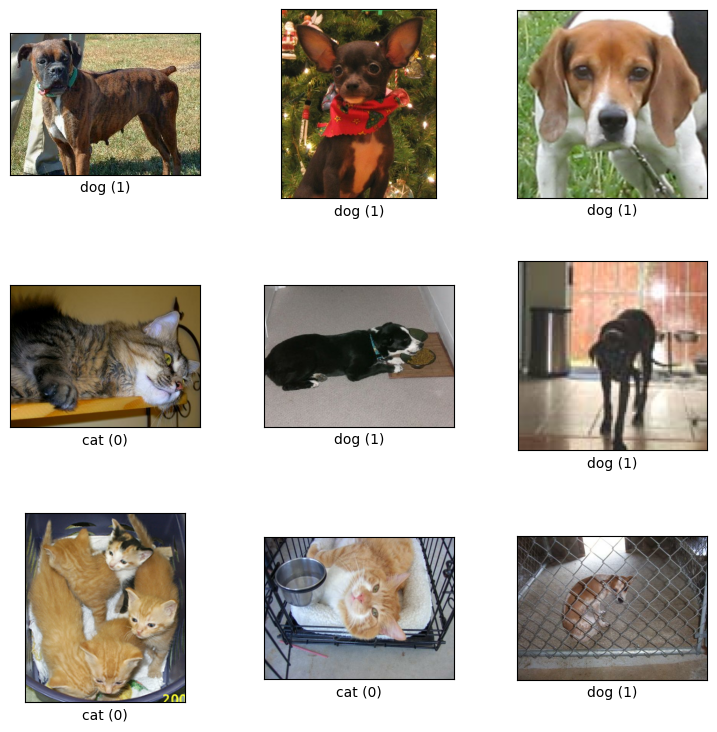

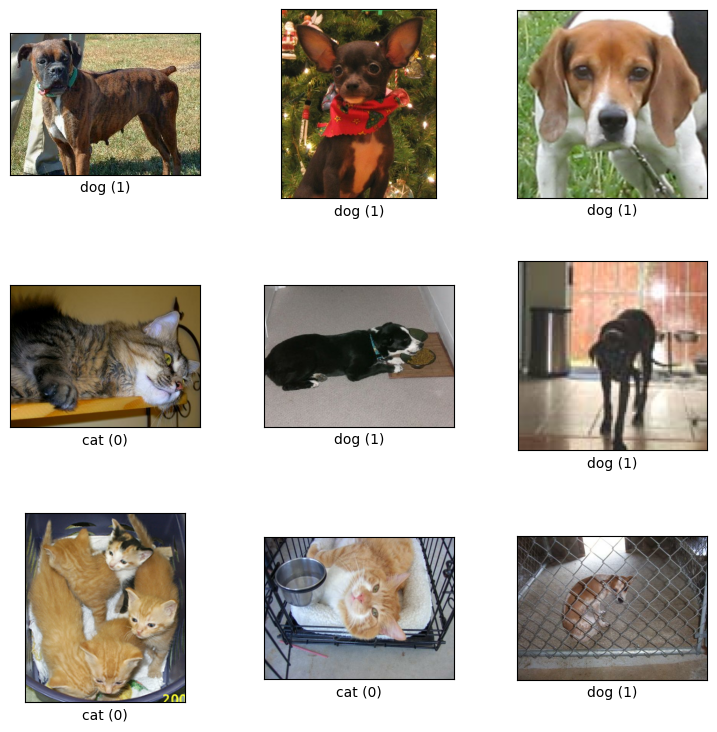

In [3]:
tfds.show_examples(datos["train"], metadatos)

####PASO 4: PREPROCESAMIENTO DEL CONJUNTO DE DATOS:
A modo de ejemplo realizaremos el preprocesamiento de solo 20 imágenes.

Deacuerdo al paso 3, haremos los siguiente:
1. Redimensionamos las imágenes a 100x100px, reduciendo e igualando su tamaño (con ello disminuimos el número de neuronas en la capa de entrada y el tiempo de entrenamiento).
2. Pasaremos de color a imágenes en escala de grises (reduciendo así el procesamiento).


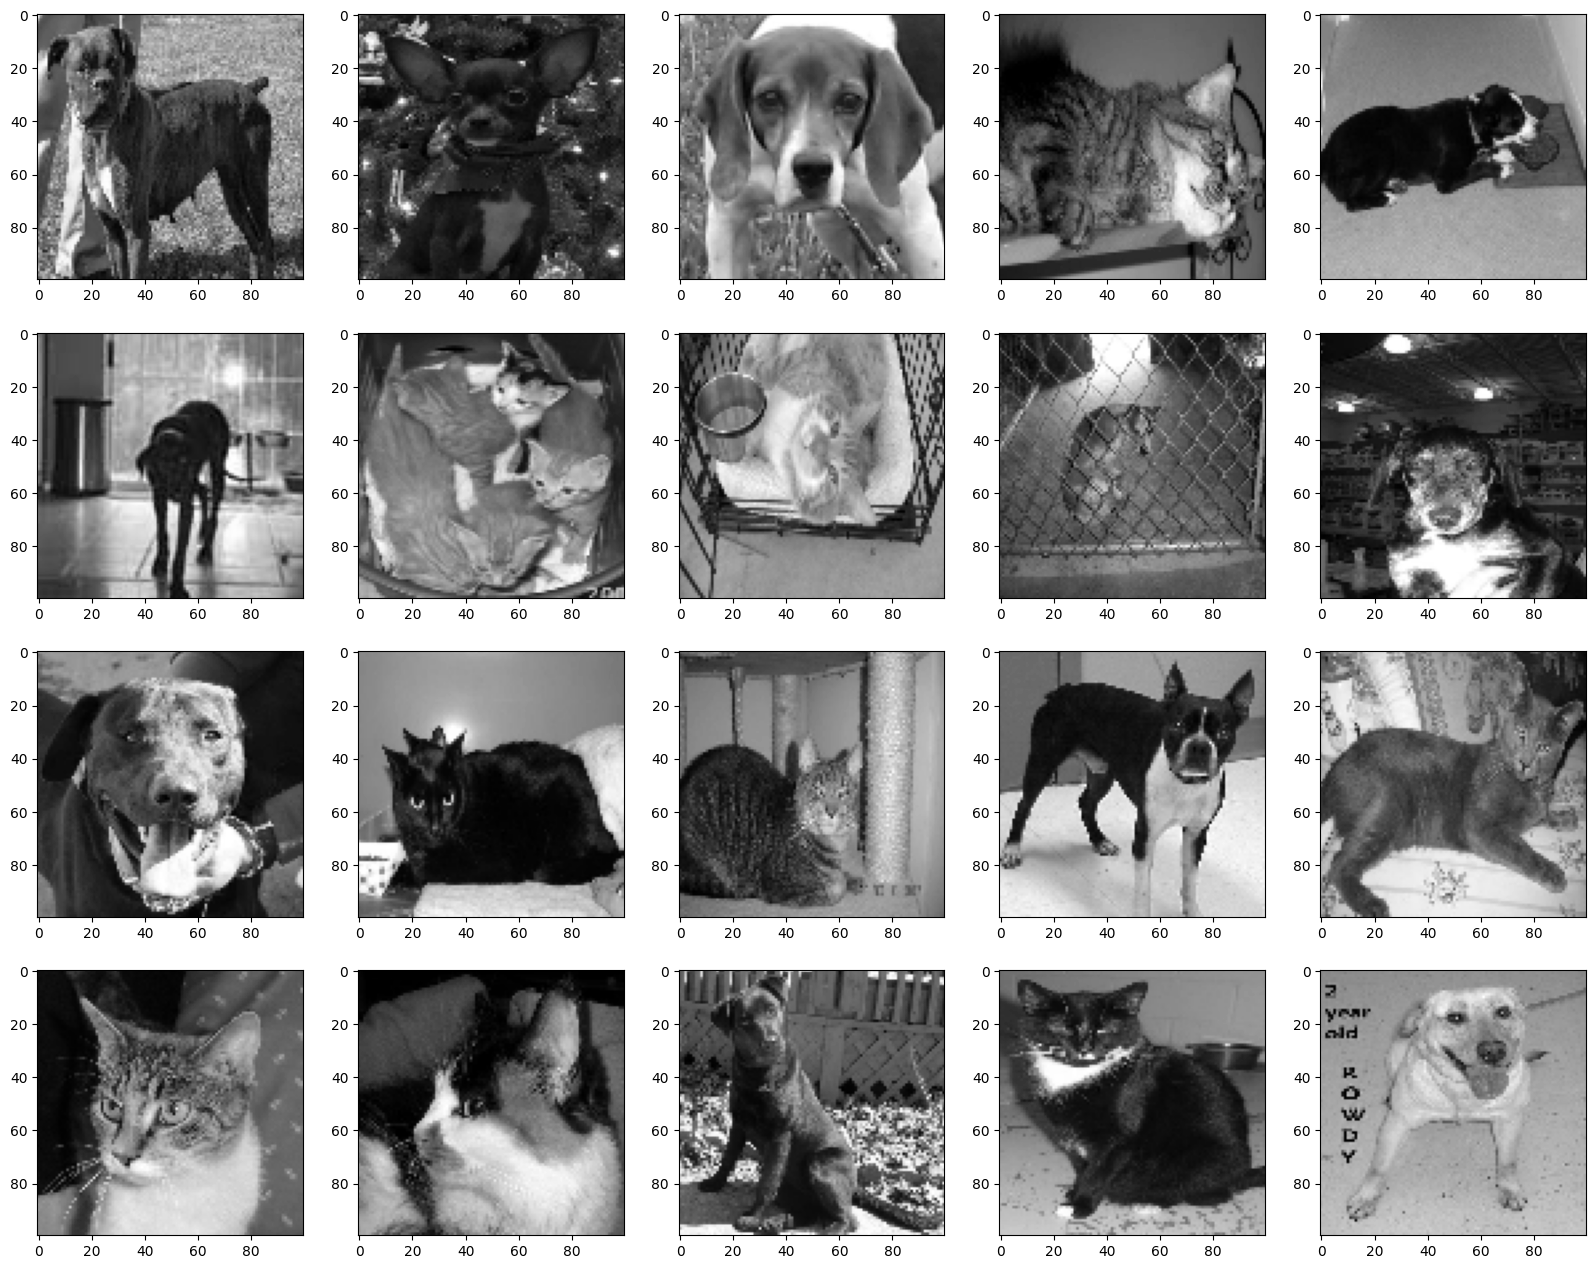

In [4]:
plt.figure(figsize=(20,20))

TAMANO_IMG=100

# redimensionamos solo a 25 imgs
for i, (imagen, etiqueta) in enumerate(datos["train"].take(20)):
  # a. Redimensionamos las imágenes a 100x100px:
  imagen = cv2.resize(imagen.numpy(), (TAMANO_IMG, TAMANO_IMG))
  # b. Pasamos de color a escala de grises:
  imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
  plt.subplot(5, 5, i+1)
  plt.imshow(imagen, cmap="gray")

In [5]:
# Creamos una lista el cual almacenará todo el conjunto de imágenes.
datos_entrenamiento = []

####PASO 5: PREPROCESAMIENTO EN TODAS LAS IMÁGENES (23262):

In [6]:
for i, (imagen, etiqueta) in enumerate(datos["train"]):
  imagen = cv2.resize(imagen.numpy(), (TAMANO_IMG, TAMANO_IMG))
  imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
  imagen = imagen.reshape(TAMANO_IMG, TAMANO_IMG, 1) # 1 canal de color.

  # datos_entrenamiento: lista que almacenará listas de dos posiciones (los pixeles
  # de la imágen y su etiqueta)
  datos_entrenamiento.append([imagen, etiqueta])

In [7]:
#datos_entrenamiento ahora contiene las 23262 imágenes preprocesadas
len(datos_entrenamiento)

23262

####PASO 6: SEPARAMOS LOS DATOS DE ENTRENAMIENTO EN X, Y:

In [8]:
X = []
y = []

# Iteramos todos los datos de entrenamiento y lo agregamos en X (imagen), y (etiqueta):
for imagen, etiqueta in datos_entrenamiento:
  X.append(imagen)
  y.append(etiqueta)

####PASO 7: NORMALIZAR LAS IMÁGENES:
A cada pixel lo dividimos entre 255, con ello los valores de cada pixel será desde 0 a 1

In [9]:
X = np.array(X).astype(float) / 255

# Pasamos a "y" en un arreglo de numpay
y = np.array(y)

#### PASO 8: MODELO CNN
Mezclaremos las capas densas, covolucionales y de agrupación:

In [13]:
modelo = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation="relu", input_shape=(100, 100, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(128, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

In [14]:
modelo.compile(
    optimizer="adam",
    loss="binary_crossentropy", #usamos esta pérdida porque es binario
    metrics=["accuracy"]
)

In [15]:
modelo.fit(
    X, y, batch_size=32,
    validation_split=0.20,
    epochs=50
)


Epoch 1/50
582/582 [==============================] - 20s 15ms/step - loss: 0.6142 - accuracy: 0.6566 - val_loss: 0.5599 - val_accuracy: 0.7124
Epoch 2/50
582/582 [==============================] - 7s 12ms/step - loss: 0.4864 - accuracy: 0.7670 - val_loss: 0.4599 - val_accuracy: 0.7769
Epoch 3/50
582/582 [==============================] - 7s 13ms/step - loss: 0.4317 - accuracy: 0.8029 - val_loss: 0.5010 - val_accuracy: 0.7610
Epoch 4/50
582/582 [==============================] - 7s 12ms/step - loss: 0.3858 - accuracy: 0.8268 - val_loss: 0.4086 - val_accuracy: 0.8162
Epoch 5/50
582/582 [==============================] - 8s 13ms/step - loss: 0.3402 - accuracy: 0.8500 - val_loss: 0.3990 - val_accuracy: 0.8221
Epoch 6/50
582/582 [==============================] - 7s 12ms/step - loss: 0.2894 - accuracy: 0.8748 - val_loss: 0.3791 - val_accuracy: 0.8304
Epoch 7/50
582/582 [==============================] - 7s 13ms/step - loss: 0.2367 - accuracy: 0.8992 - val_loss: 0.3854 - val_accuracy: 0.833

#Resultados:
1. Pérdida: 0.0067
2. Exactitud: 0.9980
3. Pérdida de pruebas: 1.2736
4. Exactitud de pruebas: 0.8122

Como resultado del entrenamiento se tiene una exactitud de alrededor del 99%, pero con los datos de prueba llegó al 81%, esto puede indicar que hay over-fitting (se da cuando el modelo de aprendizaje automático proporciona predicciones precisas para los datos de entrenamiento, pero no para los datos nuevos).

Para poder afrontar el overfitting, uno de las mejores soluciones es conseguir más datos de entrenamiento, sin embargo, a veces no es posible conseguir más datos para el entrenamiento, por ello, se opta por la siguiente solución: Regularización.

##Técnica de Regularización:
1. Reducir el tamaño de la red.
2. Regularización de pesos. (reajuste de pesos en el entrenamiento para que mejore el desempeño y aprenda más rápido generalizando los pesos)
3. Agregar dropout: algunos datos se pueden expulzar para eliminar patrones irrelevantes para el modelo, es una forma de apagar a las neuronas en distintas épocas del entrenamiento.



##CONCLUSIÓN: 🐶😺
Las redes neuronales convolucionales (CNN) son muy usadas para clasificar imágenes, ya que los procesos de convolución y filtros ayudan a encontrar patrones, por ejemplo, en el gato se busca patrones relacionado a las orejas en forma de triangulo, sin importar donde esté el triangulo, siendo este uno de los muchos patrones que el modelo puede encontrar para así entender que se trata de un gato.